<h2><b>📌 Introduction and Problem Statement</b></h2>

The objective of this task is to perform a basic exploration and visualization of the well-known Iris dataset. This dataset contains measurements of iris flowers from three different species: *Setosa, Versicolor, and Virginica.

The aim is to:
- Load and understand the structure of the dataset.
- Summarize key statistics.
- Visualize the distribution of numerical features.
- Explore relationships between features and how they vary across species.

This task is essential for building foundational skills in data inspection, interpretation, and graphical exploration using Python libraries such as *pandas, **matplotlib, and **seaborn*.

Understanding the dataset through Exploratory Data Analysis (EDA) allows us to uncover patterns, detect outliers, and form insights that are critical before applying machine learning techniques in later stages.

In [ ]:
# STEP 1: Import required libraries and data
import pandas as pd

# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')



In [5]:
# STEP 2: Dataset structure
print("Dataset Shape:", iris.shape)          # Rows and columns
print("\nColumn Names:", iris.columns.tolist())  # Feature names

# Preview first 5 rows
iris.head()

Dataset Shape: (150, 5)

Column Names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,length_ratio,width_ratio
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.018051,6.627701
std,0.828066,0.435866,1.765298,0.762238,1.061621,7.951800
min,4.300000,2.000000,1.000000,0.100000,1.050000,1.130435
25%,5.100000,2.800000,1.600000,0.300000,1.230469,1.602778
50%,5.800000,3.000000,4.350000,1.300000,1.410603,2.148352
75%,6.400000,3.300000,5.100000,1.800000,3.176471,11.583333
max,7.900000,4.400000,6.900000,2.500000,4.833333,41.000000


In [19]:
# STEP 3: Check for any missing/null values in the dataset
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
length_ratio    0
width_ratio     0
dtype: int64

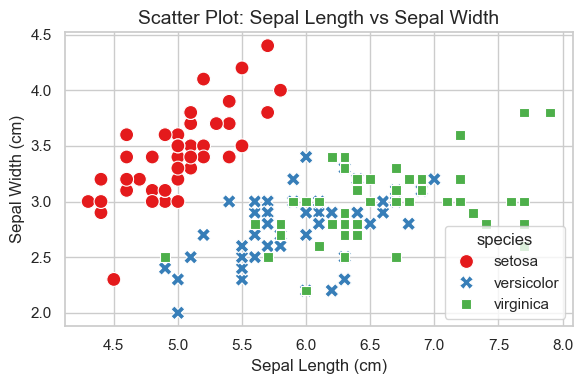

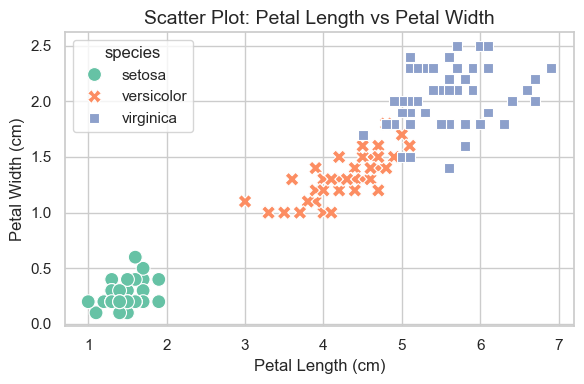

In [ ]:
# STEP 4: Exploratory Data Analysis (Set plot style for better visuals)
sns.set(style='whitegrid')

import seaborn as sns
import matplotlib.pyplot as plt

# First Scatter Plot: Sepal Length vs Sepal Width
plt.figure(figsize=(6, 4))  # Set figure size
sns.scatterplot(
    data=iris,
    x='sepal_length',        # X-axis: Sepal Length
    y='sepal_width',         # Y-axis: Sepal Width
    hue='species',           # Color by species
    style='species',         # Marker style by species
    s=100,                   # Size of the points
    palette='Set1'           # Color palette
)
plt.title("Scatter Plot: Sepal Length vs Sepal Width", fontsize=14)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.grid(True)              # Show grid for better readability
plt.tight_layout()          # Optimize layout
plt.show()

# Second Scatter Plot: Petal Length vs Petal Width (more separable between species)
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=iris,
    x='petal_length',        # X-axis: Petal Length
    y='petal_width',         # Y-axis: Petal Width
    hue='species',           # Color by species
    style='species',         # Marker style by species
    s=100,                   # Size of the points
    palette='Set2'           # Different color palette
)
plt.title("Scatter Plot: Petal Length vs Petal Width", fontsize=14)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.tight_layout()
plt.show()



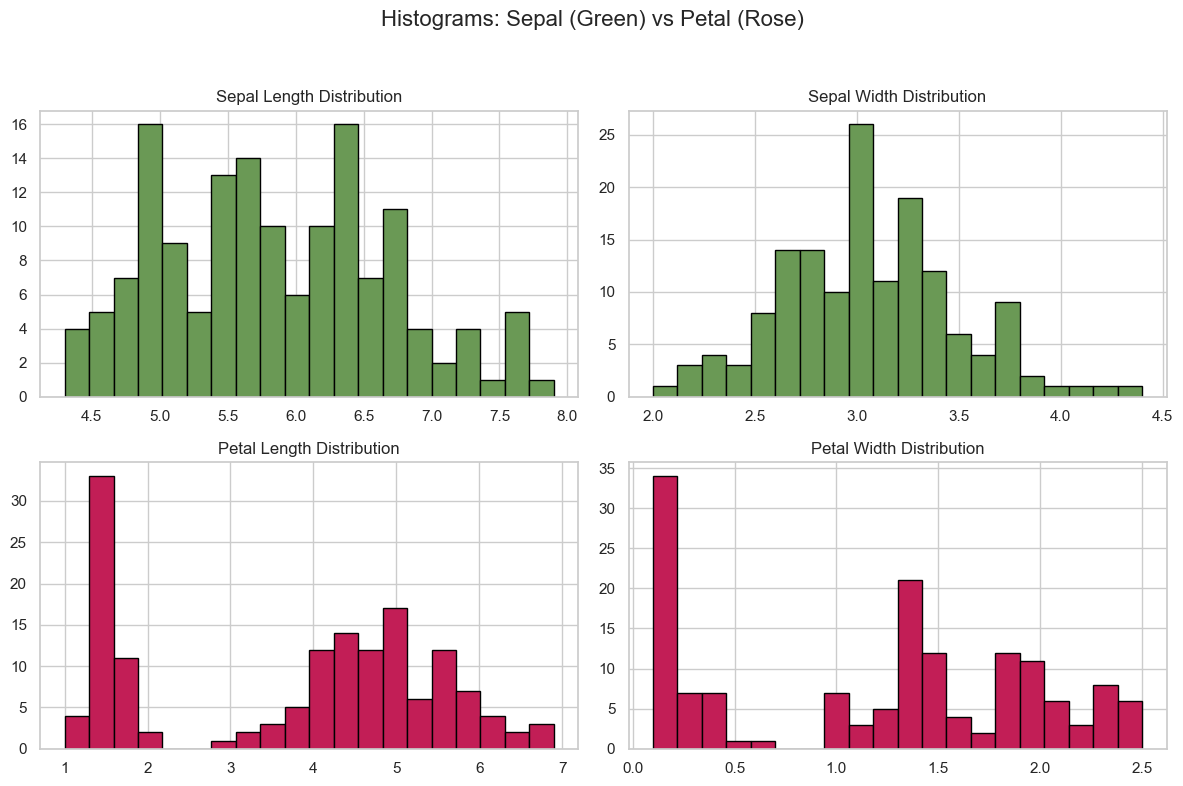

In [39]:
# STEP 5: EDA (Histograph Visualization)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Set clean plot style
sns.set(style='whitegrid')

# Define feature groups
sepal_features = ['sepal_length', 'sepal_width']
petal_features = ['petal_length', 'petal_width']

# Define colors
sepal_color = '#6A9955'   # Comment-style green
petal_color = '#C21E56'   # Rose pink (HotPink)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten 2D array to 1D for easy loop

# Plot each feature with its respective color
for i, column in enumerate(sepal_features + petal_features):
    color = sepal_color if column in sepal_features else petal_color
    axes[i].hist(iris[column], bins=20, edgecolor='black', color=color)
    axes[i].set_title(f"{column.replace('_', ' ').title()} Distribution")

# Add shared title
plt.suptitle("Histograms: Sepal (Green) vs Petal (Rose)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

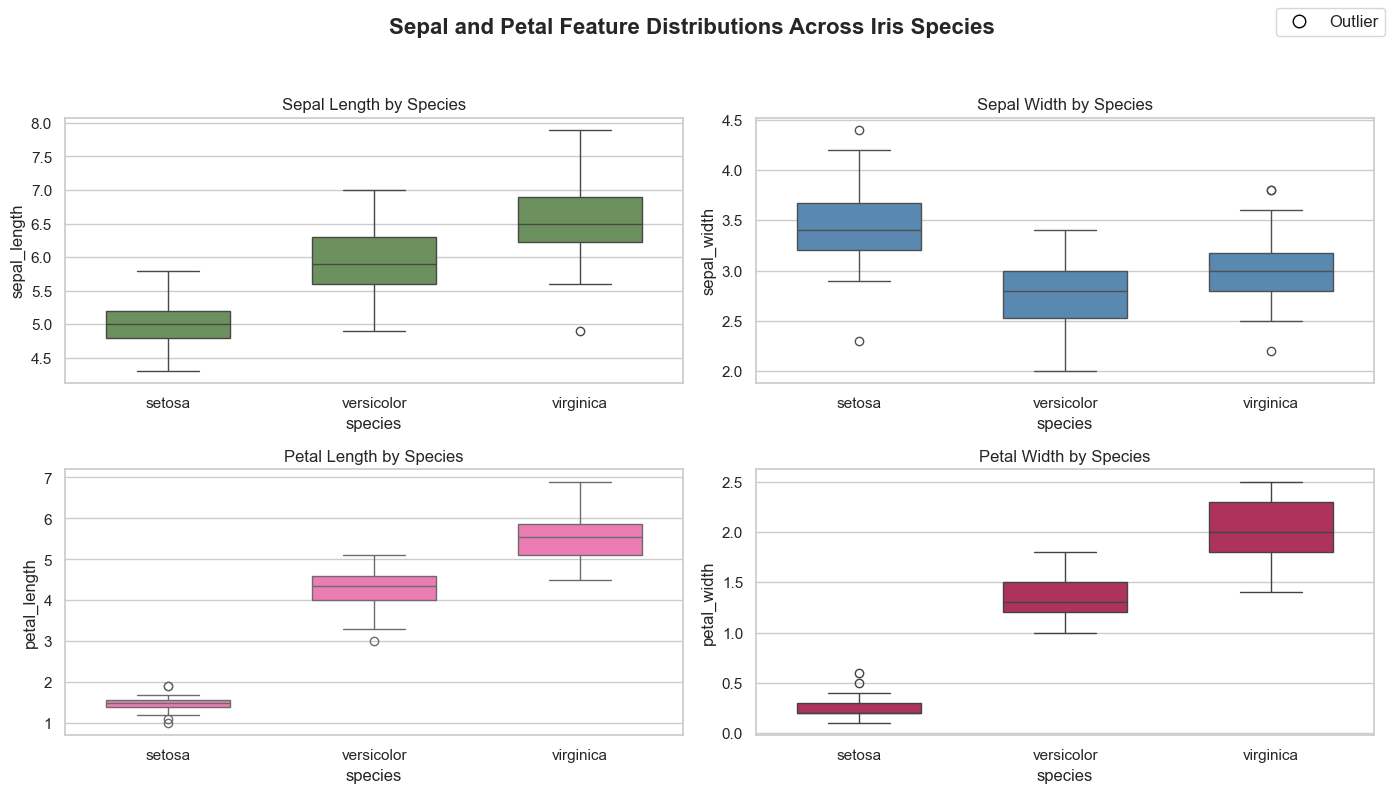

In [18]:
# STEP 6: EDA Box Plot (Visualisation)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the built-in Iris dataset from seaborn
iris = sns.load_dataset('iris')

# Set a clean grid-style background for plots
sns.set(style='whitegrid')

# Identify only the numerical features (excluding 'species')
numeric_columns = iris.select_dtypes(include='number').columns

# Define a unique color for each numerical feature
feature_colors = {
    'sepal_length': '#6A9955',  # Calm green for Sepal Length
    'sepal_width': '#4B8BBE',   # Blue for Sepal Width
    'petal_length': '#FF69B4',  # Rose pink for Petal Length
    'petal_width': '#C21E56'    # Deep red for Petal Width
}

# Set up a 2x2 subplot grid to plot all features side by side
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy looping

# Loop through each feature and draw its box plot by species
for i, column in enumerate(numeric_columns):
    sns.boxplot(
        data=iris,
        x='species',                   # Group by species
        y=column,                      # Plot each feature on Y-axis
        hue='species',                 # Color by species (required to avoid warnings)
        palette={s: feature_colors[column] for s in iris['species'].unique()},  # Use per-feature color
        dodge=False,                   # Prevent side-by-side boxes for same species
        ax=axes[i],                    # Plot on the i-th subplot
        width=0.6                      # Slightly thinner boxes
    )
    axes[i].set_title(f"{column.replace('_', ' ').title()} by Species", fontsize=12)

    # ⬇ Lower the title for bottom row plots (petal_length and petal_width)
    if i in [2, 3]:
        axes[i].title.set_position([0.5, 0.85])  # X stays centered, Y moved lower

# Add a shared main title for the full figure
fig.suptitle("Sepal and Petal Feature Distributions Across Iris Species", fontsize=16, fontweight='bold')

# Add a legend inside the figure for outliers
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Outlier',
                          markerfacecolor='none', markeredgecolor='black', markersize=9)]
fig.legend(handles=legend_elements, loc='upper right', fontsize=12)

# Adjust spacing to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()

<h2><b>Outlier Table</b></h2>

In [22]:
# STEP 7: Pulling out outliers from species data

import pandas as pd

# Detect outliers using IQR per species & feature
outliers = []
for species in iris['species'].unique():
    df = iris[iris['species'] == species]
    for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_rows = df[(df[feature] < lower) | (df[feature] > upper)]
        for idx, row in outlier_rows.iterrows():
            outliers.append({
                'Row Index': idx,                  # original dataset index
                'species': species,
                'feature': feature,
                'value': row[feature],
                'lower_bound': round(lower,4),
                'upper_bound': round(upper,4)
            })

# Print the confirmed outlier table with original index
outliers_df = pd.DataFrame(outliers)
print(outliers_df)

    Row Index     species       feature  value  lower_bound  upper_bound
0          15      setosa   sepal_width    4.4       2.4875       4.3875
1          41      setosa   sepal_width    2.3       2.4875       4.3875
2          13      setosa  petal_length    1.1       1.1375       1.8375
3          22      setosa  petal_length    1.0       1.1375       1.8375
4          24      setosa  petal_length    1.9       1.1375       1.8375
5          44      setosa  petal_length    1.9       1.1375       1.8375
6          23      setosa   petal_width    0.5       0.0500       0.4500
7          43      setosa   petal_width    0.6       0.0500       0.4500
8          98  versicolor  petal_length    3.0       3.1000       5.5000
9         106   virginica  sepal_length    4.9       5.2125       7.9125
10        117   virginica   sepal_width    3.8       2.2375       3.7375
11        119   virginica   sepal_width    2.2       2.2375       3.7375
12        131   virginica   sepal_width    3.8     

<h2><b>Concluson</b></h2>

In [ ]:
In this task, I successfully explored the Iris dataset using pandas, matplotlib, and seaborn. Through basic data inspection and various
 visualizations such as histograms, scatter plots, and box plots, we gained meaningful insights into the relationships between different f
 lower features (sepal and petal 
                                                                                                                                                         lengths and widths).
Key takeaways:
- The dataset is well-balanced and clean, with no missing values.
- Petal length and petal width showed the strongest ability to separate the different iris species.
- Visual patterns in the scatter and pair plots indicated that the *setosa* species is clearly distinct, while *versicolor* and *virginica* have 
  more overlapping features.
- Outlier analysis revealed rare but important data points that deviate significantly from the majority. These outliers help us understand the
  natural variability in each species and ensure that future models are robust and not biased by extreme or unusual values. Detecting them 
  also provides insight into measurement errors, anomalies, or truly exceptional flowers, which is crucial for both data quality 
  and domain understanding.


These insights lay a strong foundation for applying classification models in future tasks if needed. Overall, this exercise demonstrates the 
importance of Exploratory Data Analysis (EDA) in understanding the structure and patterns in any dataset before modeling.

In [ ]:
# Load and save Task - Iris dataset
import seaborn as sns
iris = sns.load_dataset("iris")
iris.to_csv("iris.csv", index=False)